In [1]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import ggplot
import seaborn as sns
import random
from scipy.stats import gaussian_kde
%matplotlib inline

# Table of Contents


## Exploring the Data


In order to just process numeric data, i dropped the strings from all the csv files containing the description ('event_type ', 'log_feature ', 'resource_type') manually with microsoft excel.


<table style="width:20%", align ="left">
<tr><td>**Before**</td></tr>
<tr><td>*id*</td><td style = "width:60%" >*event_type*</td></tr>
<tr><td>9999</td><td >event_type 15</td></tr>
<tr><td>**After**</td></tr>
<tr><td>9999</td><td >15</td></tr>
</table>










In [2]:
train = pd.read_csv("Telstra/train.csv")
events = pd.read_csv("Telstra/event_type.csv")
log_feature = pd.read_csv("Telstra/log_feature.csv")
resources = pd.read_csv("Telstra/resource_type.csv")
test = pd.read_csv("Telstra/test.csv")
severity = pd.read_csv("Telstra/severity_type.csv")


### Univariant Analysis

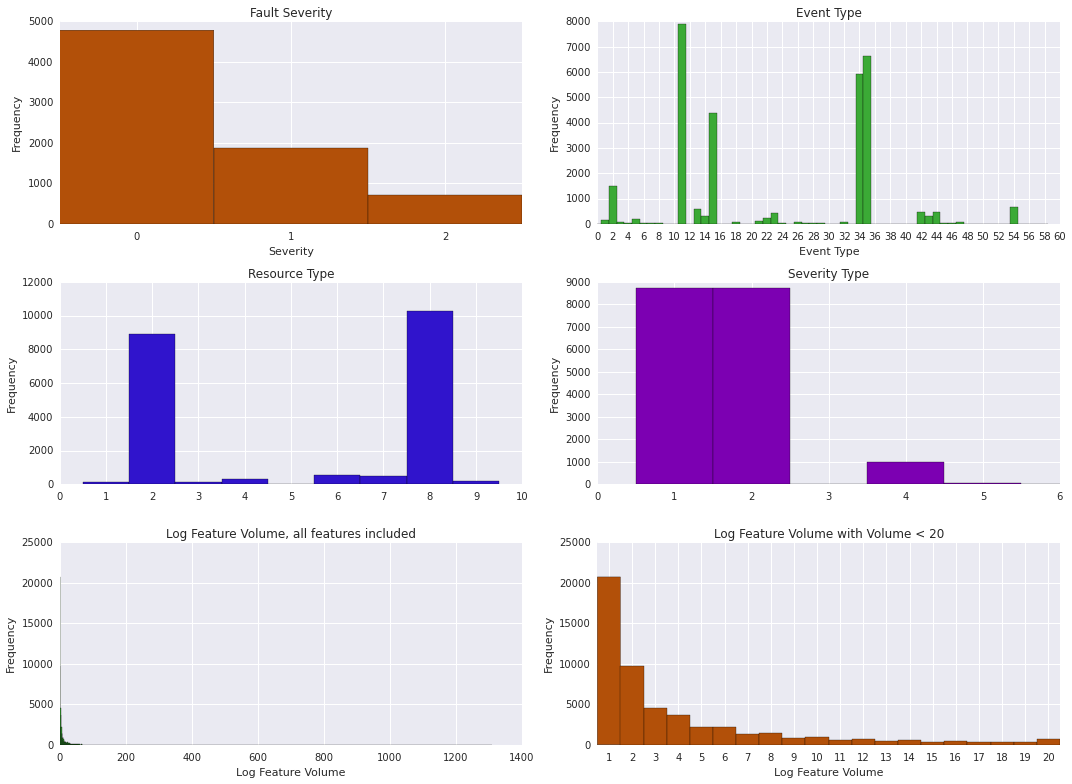

In [3]:
fig = plt.figure(figsize=(15,11))

###Fault Severity
ax1 = fig.add_subplot(321)
ax1.set_title('Fault Severity')
ax1.hist(train.fault_severity, bins=np.arange(4) - 0.5, color='#B25009')
ax1.set_xlabel('Severity')
ax1.set_ylabel('Frequency')
ax1.set_xticks(range(3))

### Event Type
ax2 = fig.add_subplot(322)
ax2.set_title('Event Type')
ax2.hist(events.event_type, bins=np.arange(60)-0.5,color='#3baa36')
ax2.set_xlabel('Event Type')
ax2.set_ylabel('Frequency')
ax2.set_xticks(range(60))
ax2.xaxis.set_major_locator(plt.MaxNLocator(30))


##Resource Type
ax3 = fig.add_subplot(323)
ax3.set_title('Resource Type')
ax3.set_ylabel('Frequency')
ax3.hist(resources.resource_type, bins=np.arange(11)-0.5, color = '#3014CC')
ax3.xaxis.set_major_locator(plt.MaxNLocator(10))

#Severity Type
ax4 = fig.add_subplot(324)
ax4.set_title('Severity Type')
ax4.set_ylabel('Frequency')
ax4.hist(severity.severity_type, bins=np.arange(10)-0.5, color = '#7C00B2')

#Log Feature (All Datapoints)
ax5 = fig.add_subplot(325)
ax5.set_title('Log Feature Volume, all features included')
ax5.set_xlabel('Log Feature Volume')
ax5.set_ylabel('Frequency')
ax5.hist(log_feature.volume,bins=np.arange(log_feature.volume.min(), log_feature.volume.max()+1), align='left',color='#3baa36')

#Log Feature (All Datapoints)
ax6 = fig.add_subplot(326)
ax6.set_title('Log Feature Volume with Volume < 20')
ax6.set_xlabel('Log Feature Volume')
ax6.set_ylabel('Frequency')
ax6.set_xticks(range(21))
ax6.hist(log_feature.volume, bins=np.arange(log_feature.volume.min(), 22), align='left',color='#B25009')

#Display the figure
plt.tight_layout()
sns.plt.show()


Our trainset shows the reports of 7381 incidents in total. Here is what i found out after graphing some of the data.


- As we can see, most of the interruptions are just a temporary network glitch ( *Fault Severity* = 0), but 1 and 2 do seem to cause problems quite frequently (around 35% of the time).

- The *event types* 11,35 and 34, 15 and 2 seem occur a lot together with a network incident ... we should definetly check how this relates in a later chapter.


- The *resource types* 8 and 2 are used most. There is a significant gap between these two resources and the rest.

- The *severity type of warning messages* 1 and 2 seem to be the most frequent ones.

- The *log features* behave a little different here: We have a bunch of different features, which occur in a different Frequency (Volume). The two graphs above show just how often a given feature appears with an issue.
 Since the feature with the largest volume occurs 1350 times, the graph on the bottom left corner is highly skewed.


### Multivariant Analysis

Lets have a look on how these features correlate with each other. In order to do so, the data has to be merged together in one single dataframe. Since 'log features' contains a wide variety of features, we will exclude this data for now and have another look at it later.

In [6]:
train = pd.read_csv("Telstra/train.csv")
events = pd.read_csv("Telstra/event_type.csv")
log_feature = pd.read_csv("Telstra/log_feature.csv")
resources = pd.read_csv("Telstra/resource_type.csv")
test = pd.read_csv("Telstra/test.csv")
severity = pd.read_csv("Telstra/severity_type.csv")

#df = pd.DataFrame(train, columns = ['id', 'location', 'fault_severity', 'event_type'])
##Removed 'event_type ' manually from csv file
#df = pd.concat([df, pd.DataFrame(events, columns = ['id', 'event_type' ])], axis=1)
#df.merge(pd.DataFrame(events, columns = ['id', 'event_type']), on='id', how='inner')
#df.join(pd.DataFrame(events, columns = ['id', 'event_type']),lsuffix='_caller', rsuffix='_other')
#df.set_index('id').join(pd.DataFrame(events, columns = ['id', 'event_type']).set_index('id'))
#df= pd.concat([df,pd.DataFrame(events, columns = ['id', 'event_type'])],axis='id')
#df.join(pd.DataFrame(events, columns = ['id', 'event_type']).set_index('id'), on='id')
#df.update(pd.DataFrame(events, columns = ['id', 'event_type']), join='left')
############################################################
#########MERGE OPERATION TO UNIFY THE DATASET###############
#train = pd.merge(df, pd.DataFrame(events, columns = ['id', 'event_type']), on='id',how='left')
############################################################
train = pd.merge(train, events, on='id', how='left')
grp = train.groupby(['event_type'])
grp.describe()
#train = pd.merge(train, severity, on='id', how='left')
#train.groupby(['id'], sort='true')
#print(train)
#train = pd.merge(train, severity, on='id', how='left')

#print (train)
#pd.tools.plotting.scatter_matrix(train.loc[:, :], diagonal="kde")
#plt.tight_layout()
#plt.show()


fault_severity            id     location
event_type                                                 
1          count       59.000000     59.000000    59.000000
           mean         0.677966  10050.355932   272.881356
           std          0.628097   5649.501488   304.200030
           min          0.000000     20.000000    12.000000
           25%          0.000000   6647.000000    73.000000
           50%          1.000000  11156.000000    79.000000
           75%          1.000000  15209.000000   533.500000
           max          2.000000  18484.000000  1008.000000
2          count      574.000000    574.000000   574.000000
           mean         0.360627   9215.710801   532.508711
           std          0.591313   5259.327536   322.975130
           min          0.000000     53.000000     1.000000
           25%          0.000000   4521.250000   240.500000
           50%          0.000000   9346.500000   508.500000
           75%          1.000000  13629.750000   804.750000
           max          2.000000  18539.000000  1126.000000
3          count       33.000000     33.000000    33.000000
           mean         0.787879   9904.757576   661.818182
           std          0.696311   5890.397785   346.177651
           min          0.000000    158.000000    32.000000
           25%          0.000000   5156.000000   532.000000
           50%          1.000000  12003.000000   655.000000
           75%          1.000000  14130.000000   977.000000
           max          2.000000  18412.000000  1023.000000
4          count       16.000000     16.000000    16.000000
           mean         0.250000   9833.125000   503.500000
           std          0.447214   5907.627644   343.363170
           min          0.000000   1035.000000    44.000000
           25%          0.000000   4439.250000    47.000000
           50%          0.000000  11141.500000   612.500000
...                          ...           ...          ...
49         std          0.816497   2280.265072   129.884051
           min          0.000000   5326.000000   642.000000
           25%          2.000000   7412.500000   643.250000
           50%          2.000000   8773.000000   644.500000
           75%          2.000000   8974.750000   831.000000
           max          2.000000  12145.000000   897.000000
51         count        3.000000      3.000000     3.000000
           mean         0.000000   6270.666667   892.000000
           std          0.000000   3789.189139     0.000000
           min          0.000000   1904.000000   892.000000
           25%          0.000000   5059.500000   892.000000
           50%          0.000000   8215.000000   892.000000
           75%          0.000000   8454.000000   892.000000
           max          0.000000   8693.000000   892.000000
53         count        5.000000      5.000000     5.000000
           mean         2.000000   8412.400000   694.200000
           std          0.000000   2537.311234   113.374159
           min          2.000000   5326.000000   642.000000
           25%          2.000000   7020.000000   643.000000
           50%          2.000000   8590.000000   644.000000
           75%          2.000000   8981.000000   645.000000
           max          2.000000  12145.000000   897.000000
54         count      264.000000    264.000000   264.000000
           mean         0.795455   9456.155303   701.598485
           std          0.747504   5474.706296   259.158300
           min          0.000000     20.000000     7.000000
           25%          0.000000   4545.000000   613.000000
           50%          1.000000   9755.500000   756.000000
           75%          1.000000  13970.250000   821.000000
           max          2.000000  18525.000000  1094.000000

[360 rows x 3 columns]